     ár  hiti  úrkoma
0  1949   3.2   565.5
1  1950   4.0   535.5
2  1951   3.4   460.6
3  1952   3.6   495.7
4  1953   4.4   979.0
Centroids =
 [[4.16876586 4.13630027]
 [6.83769634 4.27809624]
 [5.94026998 5.78795837]
 [5.40094544 3.60720016]]
Final Distortion = 0.618


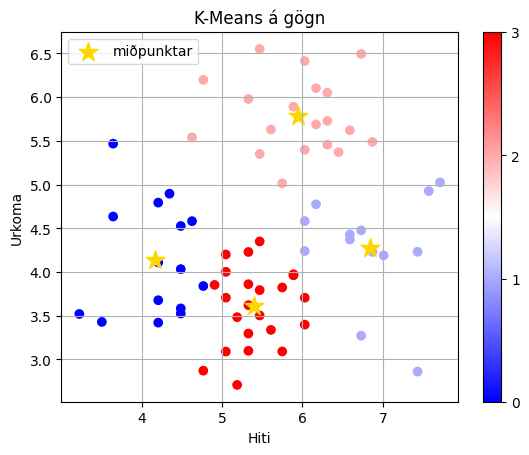

In [38]:
import pandas as pd
import numpy as np
from scipy.cluster.vq import kmeans, vq, whiten
import matplotlib.pyplot as plt

url = 'http://cs.hi.is/python/hiti-urkoma.txt'
colNames = ['ár', 'hiti', 'úrkoma']
df = pd.read_csv(url, sep='\s+', names=colNames)

print(df.head())  

hiti_arr = np.asarray(df['hiti'])
urkoma_arr = np.asarray(df['úrkoma'])
X = np.c_[hiti_arr, urkoma_arr]
X_std = whiten(X)

centroids, distortion = kmeans(X_std, 4)
clust1, clust2= vq(X_std, centroids)
print('Centroids =\n', centroids)
print(f'Final Distortion = {distortion:.3f}')
x, y = X_std.T
mx, my = centroids.T
clustass, _ = vq(X_std, centroids)


fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=clustass, cmap='bwr')  
ax.scatter(mx, my, s=200, c='gold', marker='*', label='miðpunktar')
ax.grid(True)
ax.set_xlabel('Hiti')
ax.set_ylabel('Urkoma')
ax.set_title('K-Means á gögn')
cbar = fig.colorbar(scatter, ticks=[0, 1, 2, 3])
plt.legend()
plt.show()


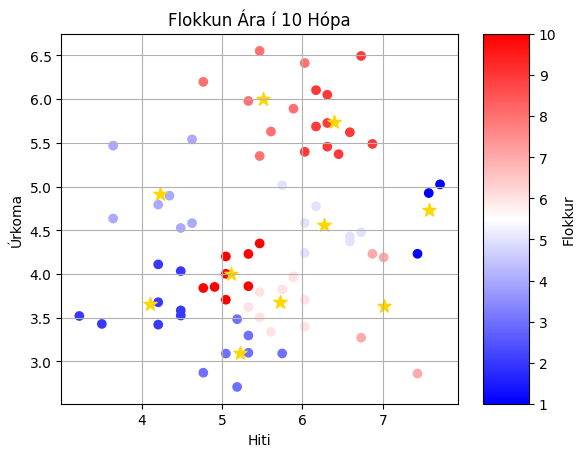

In [45]:
centroids_10, _ = kmeans(X_std, 10)
clustass_10, _ = vq(X_std, centroids_10)

fig, ax = plt.subplots()
scatter = ax.scatter(X_std[:, 0], X_std[:, 1], c=clustass_10, cmap='bwr')
mx, my = centroids_10.T
ax.scatter(mx, my, s=100, c='gold', marker='*', label='miðpunktar')
ax.set_title('Flokkun Ára í 10 Hópa')
ax.set_xlabel('Hiti')
ax.set_ylabel('Úrkoma')
ax.grid(True)
cbar = fig.colorbar(scatter, aspect=8)
cbar.set_label('Flokkur')
cbar.set_ticks(np.arange(0,10))  
cbar.set_ticklabels(np.arange(1, 11))  